# Dog Breed Classification

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.

In this project I will train a Resnet50 neural network to identify dog breeds based on the dogbreed image dataset.
**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [2]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug
!pip install torch
!pip install torchvision

In [3]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import argparse
import sagemaker
import smdebug
import boto3
import base64
import json
from PIL import Image
import io
from sagemaker.pytorch import PyTorch
from sagemaker.pytorch.model import PyTorchModel
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)
from sagemaker.debugger import (
    Rule,
    ProfilerRule,
    DebuggerHookConfig,
    rule_configs,
    ProfilerConfig,
    FrameworkProfile
)

from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
from smdebug.profiler.analysis.notebook_utils.training_job import TrainingJob
from smdebug.profiler.analysis.notebook_utils.timeline_charts import TimelineCharts
import IPython
import os
role =  'arn:aws:iam::154013814934:role/service-role/AmazonSageMaker-ExecutionRole-20221230T151109' #sagemaker.get_execution_role() #

[2023-01-18 18:21:30.403 1-8-1-cpu-py36-ml-t3-medium-05a4a7868130c7575335c53b16c7:32 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None


In [4]:
role

'arn:aws:iam::154013814934:role/service-role/AmazonSageMaker-ExecutionRole-20221230T151109'

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it. </br>

I'm using the dataset supplied to this udacity project which is the dog breed classification dataset. This dataset is comprised of 133 breeds or classes. Some examples of those classes are Affenpinschers, Akitas, Basset hounds,and Poodles. There are approximately 8300 training images,8300 test images, and 8300 validation images.


In [4]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip


--2022-12-30 20:26:07--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.112.48
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.112.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  44.8MB/s    in 24s     

2022-12-30 20:26:41 (45.2 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

Archive:  dogImages.zip
caution: filename not matched:  -q


In [9]:
!unzip dogImages.zip 

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00047.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00048.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00058.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00071.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00078.jpg  
   creating: dogImages/test/002.Afghan_hound/
  inflating: dogImages/test/002.Afghan_hound/Afghan_hound_00116.jpg  
  inflating: dogImages/test/002.Afghan_hound/Afghan_hound_00125.jpg  
  inflating: dogImages/test/002.Afghan_hound/Afghan_ho

In [4]:
bucket_name = 'dogbreedclassificationudacity'

In [5]:
!aws s3 sync --only-show-errors ./dogImages/train s3://dogbreedclassificationudacity/train/
!aws s3 sync --only-show-errors ./dogImages/valid s3://dogbreedclassificationudacity/valid/

In [21]:
!aws s3 sync --only-show-errors ./dogImages/test s3://dogbreedclassificationudacity/test/

## testing main function

In [7]:
import hpo

In [4]:
import train_model

In [15]:
import importlib

In [62]:
importlib.reload(train_model)

<module 'train_model' from '/root/CD0387-deep-learning-topics-within-computer-vision-nlp-project-starter/train_model.py'>

In [16]:
importlib.reload(hpo)

<module 'hpo' from '/root/CD0387-deep-learning-topics-within-computer-vision-nlp-project-starter/hpo.py'>

In [9]:
class Namespace:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

In [10]:
args = Namespace(batch_size = 128, test_batch_size = 1000, epochs = 2, lr = 0.01)

In [11]:
args.batch_size

128

In [12]:
train_model.main()

KeyboardInterrupt: 

In [17]:
hpo.main(args)

Defining Device:
cuda:0
Loading Model
Sending Model to Device
Epoch 0, Phase train
Epoch 0, Phase valid
Epoch 1, Phase train
Epoch 1, Phase valid
Testing Model on Whole Testing Dataset
Testing Accuracy: 504704912.08133966, Testing Loss: 1.401298464324817e-45


## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

I chose to tune lr (learning rate), batch_size, and epochs, because they seemed to me like they would have the largest impact on training speed and accuracy. I kept the epochs range rather small in order to avoid large cost accumulation during the course of this project. </br>

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [8]:
#TODO: Create estimators for your HPs

estimator = PyTorch(
    entry_point="hpo.py",
    role=role,
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.g4dn.xlarge",
)

In [9]:
hyperparameter_ranges = {
    "lr": ContinuousParameter(0.0001, 0.1),
    "batch_size": CategoricalParameter([32, 64, 128, 256, 512]),
    "epochs": CategoricalParameter([1,2,3,4])
}

In [10]:
objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]

In [11]:
tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=4,
    max_parallel_jobs=2,
    objective_type=objective_type
)

In [12]:
# TODO: Fit your HP Tuner
tuner.fit(wait = True) # TODO: Remember to include your data channels

...............................................................................................................................................................................................................................................................................................................!


In [13]:
tuner.best_training_job()

'pytorch-training-230116-2139-004-d6c1370e'

In [14]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator()

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()


2023-01-16 22:02:45 Starting - Found matching resource for reuse
2023-01-16 22:02:45 Downloading - Downloading input data
2023-01-16 22:02:45 Training - Training image download completed. Training in progress.
2023-01-16 22:02:45 Uploading - Uploading generated training model
2023-01-16 22:02:45 Completed - Resource retained for reuse


{'_tuning_objective_metric': '"average test loss"',
 'batch_size': '"256"',
 'epochs': '"4"',
 'lr': '0.0037606895378491374',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2023-01-16-21-39-13-436"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-154013814934/pytorch-training-2023-01-16-21-39-13-436/source/sourcedir.tar.gz"'}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [6]:
rules = [
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
    Rule.sagemaker(rule_configs.loss_not_decreasing()),
    ProfilerRule.sagemaker(rule_configs.LowGPUUtilization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport())
]

In [7]:
debugger_config = DebuggerHookConfig(
    hook_parameters={"train.save_interval": "100", "eval.save_interval": "10"}
)
profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=10)
)

In [8]:
hyperparameters = {"epochs": "4", "batch_size": "256", "lr": '0.0037606895378491374'}

In [9]:
estimator = PyTorch(
    entry_point="train_model.py",
    base_job_name="dogbreedclassification-pytorch",
    role = role,
    instance_count=1,
    instance_type="ml.g4dn.xlarge",
    hyperparameters=hyperparameters,
    framework_version="1.8",
    py_version="py36",
    ## Debugger and Profiler Parameters
    rules=rules,
    debugger_hook_config=debugger_config,
    profiler_config = profiler_config
)

In [10]:
estimator.fit(wait = True)

2023-01-18 13:04:51 Starting - Starting the training job...
2023-01-18 13:05:13 Starting - Preparing the instances for trainingVanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
LossNotDecreasing: InProgress
LowGPUUtilization: InProgress
ProfilerReport: InProgress
......
2023-01-18 13:06:17 Downloading - Downloading input data...
2023-01-18 13:06:52 Training - Downloading the training image.....................
2023-01-18 13:10:14 Training - Training image download completed. Training in progress..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2023-01-18 13:10:25,685 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2023-01-18 13:10:25,712 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2023-01-18 13:10:25,716 sagemaker_pytorch_container.training INFO     Invoking user training scr

In [11]:
job_name = estimator.latest_training_job.name
client = estimator.sagemaker_session.sagemaker_client
description = client.describe_training_job(TrainingJobName=estimator.latest_training_job.name)

In [12]:
job_name

'dogbreedclassification-pytorch-2023-01-18-13-04-51-108'

In [13]:
client

In [15]:
description

{'TrainingJobName': 'dogbreedclassification-pytorch-2023-01-18-13-04-51-108',
 'TrainingJobArn': 'arn:aws:sagemaker:us-east-1:154013814934:training-job/dogbreedclassification-pytorch-2023-01-18-13-04-51-108',
 'ModelArtifacts': {'S3ModelArtifacts': 's3://sagemaker-us-east-1-154013814934/dogbreedclassification-pytorch-2023-01-18-13-04-51-108/output/model.tar.gz'},
 'TrainingJobStatus': 'Completed',
 'SecondaryStatus': 'Completed',
 'HyperParameters': {'batch_size': '"256"',
  'epochs': '"4"',
  'lr': '"0.0037606895378491374"',
  'sagemaker_container_log_level': '20',
  'sagemaker_job_name': '"dogbreedclassification-pytorch-2023-01-18-13-04-51-108"',
  'sagemaker_program': '"train_model.py"',
  'sagemaker_region': '"us-east-1"',
  'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-154013814934/dogbreedclassification-pytorch-2023-01-18-13-04-51-108/source/sourcedir.tar.gz"'},
 'AlgorithmSpecification': {'TrainingImage': '763104351884.dkr.ecr.us-east-1.amazonaws.com/pytorch-training:

In [14]:
estimator.latest_job_debugger_artifacts_path()

's3://sagemaker-us-east-1-154013814934/dogbreedclassification-pytorch-2023-01-18-13-04-51-108/debug-output'

## Analysis of Debugging Output

In [16]:
# Code borrowed from Udacity's model_profileing.ipynb
session = boto3.session.Session()
region = session.region_name

training_job_name = estimator.latest_training_job.name
print(f"Training jobname: {training_job_name}")
print(f"Region: {region}")

trial = create_trial(estimator.latest_job_debugger_artifacts_path())

print(trial.tensor_names())
print(len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.TRAIN)))
print(len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.EVAL)))

tj = TrainingJob(training_job_name, region)
tj.wait_for_sys_profiling_data_to_be_available()

system_metrics_reader = tj.get_systems_metrics_reader()
system_metrics_reader.refresh_event_file_list()

view_timeline_charts = TimelineCharts(
    system_metrics_reader,
    framework_metrics_reader=None,
    select_dimensions=["CPU", "GPU"],
    select_events=["total"],
)

rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"
print(f"You will find the profiler report in {rule_output_path}")

! aws s3 ls {rule_output_path} --recursive
! aws s3 cp {rule_output_path} ./ --recursive

# get the autogenerated folder name of profiler report
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

Training jobname: dogbreedclassification-pytorch-2023-01-18-13-04-51-108
Region: us-east-1
[2023-01-18 13:25:03.559 1-8-1-cpu-py36-ml-t3-medium-05a4a7868130c7575335c53b16c7:33 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-154013814934/dogbreedclassification-pytorch-2023-01-18-13-04-51-108/debug-output
[2023-01-18 13:25:04.021 1-8-1-cpu-py36-ml-t3-medium-05a4a7868130c7575335c53b16c7:33 INFO trial.py:198] Training has ended, will refresh one final time in 1 sec.
[2023-01-18 13:25:05.047 1-8-1-cpu-py36-ml-t3-medium-05a4a7868130c7575335c53b16c7:33 INFO trial.py:210] Loaded all steps
['CrossEntropyLoss_output_0', 'gradient/ResNet_fc.0.bias', 'gradient/ResNet_fc.0.weight', 'layer1.0.relu_input_0', 'layer1.0.relu_input_1', 'layer1.0.relu_input_2', 'layer1.1.relu_input_0', 'layer1.1.relu_input_1', 'layer1.1.relu_input_2', 'layer1.2.relu_input_0', 'layer1.2.relu_input_1', 'layer1.2.relu_input_2', 'layer2.0.relu_input_0', 'layer2.0.relu_input_1', 'layer2.0.relu

You will find the profiler report in s3://sagemaker-us-east-1-154013814934/dogbreedclassification-pytorch-2023-01-18-13-04-51-108/rule-output
2023-01-18 13:23:05     417435 dogbreedclassification-pytorch-2023-01-18-13-04-51-108/rule-output/ProfilerReport/profiler-output/profiler-report.html
2023-01-18 13:23:05     274079 dogbreedclassification-pytorch-2023-01-18-13-04-51-108/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2023-01-18 13:23:00        538 dogbreedclassification-pytorch-2023-01-18-13-04-51-108/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2023-01-18 13:23:00       5587 dogbreedclassification-pytorch-2023-01-18-13-04-51-108/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2023-01-18 13:23:00       2036 dogbreedclassification-pytorch-2023-01-18-13-04-51-108/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2023-01-18 13:23:00        310 dogbreedclassification-pytorch-2023-01

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it? </br>
It does seem like there is anomalous behavior in my debugging output. Some examples are below.
1. I have an overfitting error. Overfitting can be fixed in a few ways. I can decrease the size of my network down from a resnet50 to a resnet 18, for example. I can also augment the data that I'm using for the project.</br>
2. I have low GPU utilization. I could avoid this in the future by either increasing batch size or using a smaller instance. </br>

## Model Deploying

In [7]:
from sagemaker.model_monitor import DataCaptureConfig
from sagemaker.serializers import JSONSerializer
from sagemaker.deserializers import JSONDeserializer

In [8]:
trained_model = PyTorchModel(model_data = 's3://sagemaker-us-east-1-154013814934/dogbreedclassification-pytorch-2023-01-18-13-04-51-108/output/model.tar.gz',
                             role = role,
                             entry_point = 'inference.py',
                             framework_version = '1.8',
                             py_version = 'py36',
                             source_dir = 'code/')

In [9]:
data_capture_config = DataCaptureConfig(
  destination_s3_uri = "s3://sagemaker-us-east-1-154013814934/data_capture/",
  enable_capture = True
)
predictor=trained_model.deploy(role = role,
                           initial_instance_count = 1,
                           data_capture_config = data_capture_config,
                           instance_type = 'ml.t2.medium',
                           serializer=JSONSerializer(),
                           deserializer=JSONDeserializer())

----------!

In [63]:
tmp_name = 'dogImages/valid/007.American_foxhound/American_foxhound_00526.jpg'
data = {}
with open(tmp_name, "rb") as image_file:
    image = base64.b64encode(image_file.read())
    
data['inputs'] = base64.encodebytes(image).decode('ascii')

In [64]:
imageStream = io.BytesIO(base64.b64decode(base64.decodebytes(data['inputs'].encode('ascii'))))
test_image2 = Image.open(imageStream)

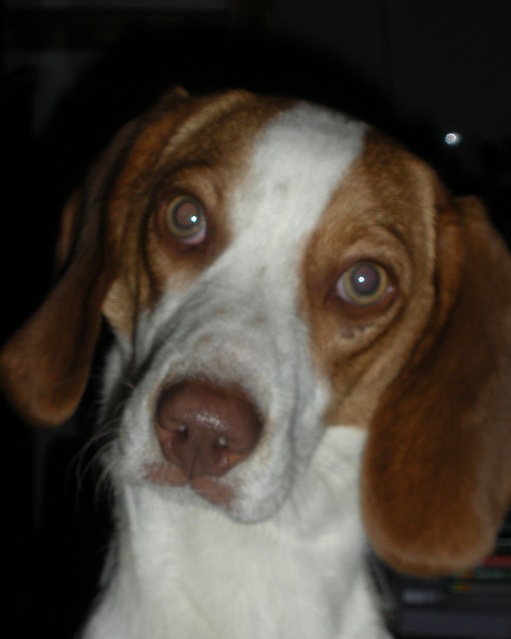

In [65]:
test_image2

In [66]:
# TODO: Run an prediction on the endpoint

#image = # TODO: Your code to load and preprocess image to send to endpoint for prediction
response = predictor.predict(data)

In [69]:
len(response[0])

133

In [67]:
response

[[-8.44900894165039,
  -6.76777982711792,
  -5.57310152053833,
  -2.573413610458374,
  -9.345908164978027,
  -8.872673988342285,
  5.129315376281738,
  -0.8739115595817566,
  -4.04814338684082,
  -4.544404983520508,
  -4.700314044952393,
  -4.047562599182129,
  -3.575589418411255,
  1.9461194276809692,
  -2.8994791507720947,
  3.3558602333068848,
  -7.13115930557251,
  -5.412714004516602,
  -6.468892574310303,
  -5.145796298980713,
  -9.712895393371582,
  -11.241738319396973,
  -6.021214485168457,
  -8.626444816589355,
  -4.4801740646362305,
  -8.697810173034668,
  -2.910519599914551,
  -1.1547939777374268,
  -5.922508239746094,
  -2.792123317718506,
  -5.951056003570557,
  -4.899544715881348,
  -6.249343395233154,
  -3.634546995162964,
  -5.645223140716553,
  -5.572770595550537,
  4.153204917907715,
  -5.709435939788818,
  -4.333207130432129,
  -6.797924995422363,
  -7.1474480628967285,
  -5.0150017738342285,
  -3.412519693374634,
  -6.573685169219971,
  -0.5065762996673584,
  -1.2052

In [10]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()